# Multiple Regression

Now that we have explored ways to use multiple attributes to predict a categorical variable, let us return to predicting a quantitative variable. Predicting a numerical quantity is called regression, and a commonly used method to use multiple attributes for regression is called *multiple linear regression*.

## Home Prices

The following dataset of house prices and attributes was collected over several years for the city of Ames, Iowa. A [description of the dataset appears online](http://ww2.amstat.org/publications/jse/v19n3/decock.pdf). We will focus only a subset of the columns. We will try to predict the sale price column from the other columns.

In [1]:
path_data = '../../data/'

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
np.set_printoptions(suppress=True)

In [2]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    return np.mean(standard_units(t[x])*standard_units(t[y])).item(0)

In [45]:
all_sales = pd.read_csv(path_data + 'house.csv')
# len(all_sales)
all_sales

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
4         5  527105010           60        RL          74.0     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL          37.0      7937   Pave   
2926   2927  923276100           20        RL           NaN      8885   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0      NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1      NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2      NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3      NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4      NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   
...    ...       ...          ...  ...       ...     ...    ...          ...   
2925   NaN       IR1          Lvl  ...         0     NaN  GdPrv          NaN   
2926   NaN       IR1          Low  ...         0     NaN  MnPrv          NaN   
2927   NaN       Reg          Lvl  ...         0     NaN  MnPrv         Shed   
2928   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
2929   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   

     Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0           0       5    2010       WD           Normal     215000  
1           0       6    2010       WD           Normal     105000  
2       12500       6    2010       WD           Normal     172000  
3           0       4    2010       WD           Normal     244000  
4           0       3    2010       WD           Normal     189900  
...       ...     ...     ...       ...             ...        ...  
2925        0       3    2006       WD           Normal     142500  
2926        0       6    2006       WD           Normal     131000  
2927      700       7    2006       WD           Normal     132000  
2928        0       4    2006       WD           Normal     170000  
2929        0      11    2006       WD           Normal     188000  

[2930 rows x 82 columns]

In [6]:
all_sales.describe()

Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026      1.111537    30.245361       20.860286    179.112611   
min        1.000000      1.000000  1872.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1954.000000     1965.000000      0.000000   
50%        6.000000      5.000000  1973.000000     1993.000000      0.000000   
75%        7.000000      6.000000  2001.000000     2004.000000    164.000000   
max       10.000000      9.000000  2010.000000     2010.000000   1600.000000   

       ...  Wood Deck SF  Open Porch SF  Enclosed Porch   3Ssn Porch  \
count  ...   2930.000000    2930.000000     2930.000000  2930.000000   
mean   ...     93.751877      47.533447       23.011604     2.592491   
std    ...    126.361562      67.483400       64.139059    25.141331   
min    ...      0.000000       0.000000        0.000000     0.000000   
25%    ...      0.000000       0.000000        0.000000     0.000000   
50%    ...      0.000000      27.000000        0.000000     0.000000   
75%    ...    168.000000      70.000000        0.000000     0.000000   
max    ...   1424.000000     742.000000     1012.000000   508.000000   

       Screen Porch    Pool Area      Misc Val      Mo Sold      Yr Sold  \
count   2930.000000  2930.000000   2930.000000  2930.000000  2930.000000   
mean      16.002048     2.243345     50.635154     6.216041  2007.790444   
std       56.087370    35.597181    566.344288     2.714492     1.316613   
min        0.000000     0.000000      0.000000     1.000000  2006.000000   
25%        0.000000     0.000000      0.000000     4.000000  2007.000000   
50%        0.000000     0.000000      0.000000     6.000000  2008.000000   
75%        0.000000     0.000000      0.000000     8.000000  2009.000000   
max      576.000000   800.000000  17000.000000    12.000000  2010.000000   

           SalePrice  
count    2930.000000  
mean   180796.060068  
std     79886.692357  
min     12789.000000  
25%    129500.000000  
50%    160000.000000  
75%    213500.000000  
max    755000.000000  

[8 rows x 39 columns]

In [9]:
sales1 = all_sales[all_sales['Bldg Type'] == '1Fam']
sales2 = sales1[sales1['Sale Condition'] == 'Normal']

sales = sales2[['SalePrice', '1st Flr SF', '2nd Flr SF', 
    'Total Bsmt SF', 'Garage Area', 
    'Wood Deck SF', 'Open Porch SF', 'Lot Area', 
    'Year Built', 'Yr Sold']]

sales = sales.sort_values(by=['SalePrice'])

len(sales)

2002

A histogram of sale prices shows a large amount of variability and a distribution that is clearly not normal. A long tail to the right contains a few houses that had very high prices. The short left tail does not contain any houses that sold for less than $35,000.

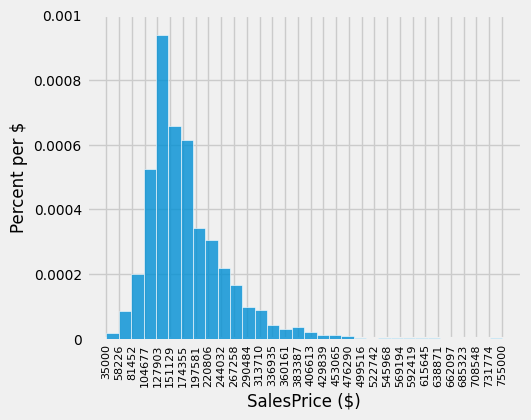

In [11]:
fig, ax = plt.subplots(figsize=(5,4))
ax.hist(sales['SalePrice'], bins=32, density=True, alpha=0.8, ec='white', zorder=5)

unit = '$'
y_label = 'Percent per ' + (unit if unit else 'unit')
x_label = 'SalesPrice ($)' 
plt.ylabel(y_label, fontsize=12)
plt.xlabel(x_label, fontsize=12)

x_min, x_max = sales['SalePrice'].min(), sales['SalePrice'].max()   ### multiple assignment
ax.set_xticks(np.linspace(x_min, x_max+.01, 32))
# ax.set_xticks(np.linspace(0, 800000, 9))

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=10)

y_vals = ax.get_yticks()
ax.set_yticks(y_vals)
ax.set_yticklabels(['{:g}'.format(x * 100) for x in y_vals])

plt.title('');
plt.show()

### Correlation

No single attribute is sufficient to predict the sale price. For example, the area of first floor, measured in square feet, correlates with sale price but only explains some of its variability.

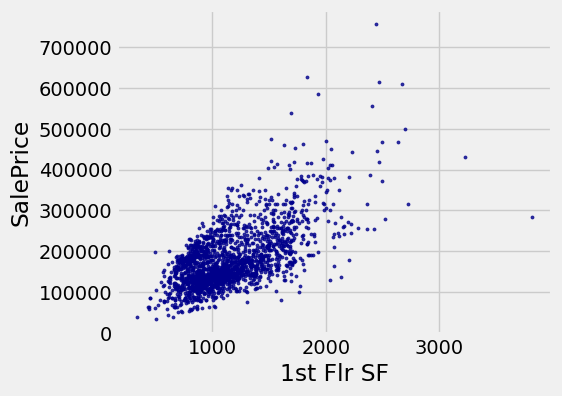

In [12]:
fig, ax = plt.subplots(figsize=(5,4))

ax.scatter(
    sales['1st Flr SF'], 
    sales['SalePrice'],   
    color='darkblue', 
    alpha=0.8,
    s=5
)

x_label = '1st Flr SF'
y_label = 'SalePrice'

plt.ylabel(y_label)
plt.xlabel(x_label)
plt.show()

In [8]:
correlation(sales, 'SalePrice', '1st Flr SF')

0.6424662541030225

In fact, none of the individual attributes have a correlation with sale price that is above 0.7 (except for the sale price itself).

In [13]:
for label in sales.columns:
    print('Correlation of', label, 'and SalePrice:\t', correlation(sales, label, 'SalePrice'))

Correlation of SalePrice and SalePrice:	 1.0
Correlation of 1st Flr SF and SalePrice:	 0.6424662541030225
Correlation of 2nd Flr SF and SalePrice:	 0.3575218942800824
Correlation of Total Bsmt SF and SalePrice:	 0.652978626757169
Correlation of Garage Area and SalePrice:	 0.6385944852520442
Correlation of Wood Deck SF and SalePrice:	 0.3526986661950491
Correlation of Open Porch SF and SalePrice:	 0.3369094170263733
Correlation of Lot Area and SalePrice:	 0.29082345511576946
Correlation of Year Built and SalePrice:	 0.5651647537135916
Correlation of Yr Sold and SalePrice:	 0.025948579080721124


However, combining attributes can provide higher correlation. In particular, if we sum the first floor and second floor areas, the result has a higher correlation than any single attribute alone.

In [21]:
sales_copy = sales.copy()
both_floors = sales_copy.iloc[:,1] + sales_copy.iloc[:,2]

sales_copy['Both Floors'] = both_floors
correlation(sales_copy, 'SalePrice', 'Both Floors')

0.7821920556134877

In [22]:
# sales_copy.iloc[:,2]
# sales_copy['2nd Flr SF']

This high correlation indicates that we should try to use more than one attribute to predict the sale price. In a dataset with multiple observed attributes and a single numerical value to be predicted (the sale price in this case), multiple linear regression can be an effective technique.

## Multiple Linear Regression 

In multiple linear regression, a numerical output is predicted from numerical input attributes by multiplying each attribute value by a different slope, then summing the results. In this example, the slope for the `1st Flr SF` would represent the dollars per square foot of area on the first floor of the house that should be used in our prediction. 

Before we begin prediction, we split our data randomly into a training and test set of equal size.

### Train/Test split

In [46]:
sales_copy = sales.copy()
train = sales_copy.sample(1001, replace=False)
test = sales_copy.drop(train.index)

print(f"{len(train)} training and {len(test)} test instances.")

1001 training and 1001 test instances.


### Function for train/test split

In [33]:
def split(self, k):
    if not 1 <= k <= (len(self) - 1):
        raise ValueError("Invalid value of k. k must be between 1 and the"
                         "number of rows - 1")

    rows = np.random.permutation(len(self))     ### random shuffle of indices
    first = self.take(rows[:k])                 ### first k random rows → training set
    rest = self.take(rows[k:])                  ### remaining random rows → test set

    return (first, rest)                          ### return a single tuple object

train, test = split(sales, 1001)

print(len(train), 'training and', len(test), 'test instances.')

1001 training and 1001 test instances.


### The scikit learn way
We could employ the scikit learn [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn-model-selection-train-test-split) function to determine the train, test split.

In [36]:
import numpy as np
from sklearn.model_selection import train_test_split

train, test = train_test_split(sales_copy, test_size=0.5)

print(len(train), 'training and', len(test), 'test instances.')

1001 training and 1001 test instances.


The slopes in multiple regression is an array that has one slope value for each attribute in an example. Predicting the sale price involves multiplying each attribute by the slope and summing the result.

In [41]:
def predict(slopes, row):
    return sum(slopes * np.array(row))

example_row1 = test.drop(columns=['SalePrice'])
example_row = example_row1.iloc[0]

print('Predicting sale price for:')
print(example_row)

example_slopes = np.random.normal(10, 1, len(example_row))

print('\nUsing slopes:\n', example_slopes)

print('\nResult:', predict(example_slopes, example_row))

Predicting sale price for:
1st Flr SF       1567.0
2nd Flr SF          0.0
Total Bsmt SF    1567.0
Garage Area       714.0
Wood Deck SF      264.0
Open Porch SF      32.0
Lot Area         9819.0
Year Built       1977.0
Yr Sold          2009.0
Name: 987, dtype: float64

Using slopes:
 [11.23921808 11.6901262  10.10896541  9.80418403 11.57473382  8.55530722
 10.69362051 10.34192697  8.8555199 ]

Result: 187019.67939760862


The result is an estimated sale price, which can be compared to the actual sale price to assess whether the slopes provide accurate predictions. Since the `example_slopes` above were chosen at random, we should not expect them to provide accurate predictions at all.

In [43]:
print('Actual sale price:', test['SalePrice'].iloc[0])
print('Predicted sale price using random slopes:', predict(example_slopes, example_row))

Actual sale price: 196000
Predicted sale price using random slopes: 187019.67939760862


### Least Squares Regression

The next step in performing multiple regression is to define the least squares objective. We perform the prediction for each row in the training set, and then compute the root mean squared error (RMSE) of the predictions from the actual prices.

In [51]:
train_prices = train.iloc[:,0]
train1 = train.copy()
train_attributes = train1.drop(train1.columns[0], axis=1)

def rmse(slopes, attributes, prices):
    errors = []
    for i in np.arange(len(prices)):
        predicted = predict(slopes, attributes.iloc[i])
        actual = prices.iloc[i]
        errors.append((predicted - actual) ** 2)
    return np.mean(errors) ** 0.5

def rmse_train(slopes):
    return rmse(slopes, train_attributes, train_prices)

print('RMSE of all training examples using random slopes:', rmse_train(example_slopes))

RMSE of all training examples using random slopes: 82740.47779366456


Finally, we use the `minimize` function to find the slopes with the lowest RMSE. Since the function we want to minimize, `rmse_train`, takes an array instead of a number, we must pass the `array=True` argument to `minimize`. When this argument is used, `minimize` also requires an initial guess of the slopes so that it knows the dimension of the input array. Finally, to speed up optimization, we indicate that `rmse_train` is a smooth function using the `smooth=True` attribute. Computation of the best slopes may take several minutes.

[scipy optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)

In [52]:
from scipy import optimize

def minimize(f, start=None, smooth=False, log=None, array=False, **vargs):
    """Minimize a function f of one or more arguments.
    Args:
        f: A function that takes numbers and returns a number
        start: A starting value or list of starting values
        smooth: Whether to assume that f is smooth and use first-order info
        log: Logging function called on the result of optimization (e.g. print)
        vargs: Other named arguments passed to scipy.optimize.minimize
    Returns either:
        (a) the minimizing argument of a one-argument function
        (b) an array of minimizing arguments of a multi-argument function
    """
    if start is None:
        assert not array, "Please pass starting values explicitly when array=True"
        arg_count = f.__code__.co_argcount
        assert arg_count > 0, "Please pass starting values explicitly for variadic functions"
        start = [0] * arg_count
    if not hasattr(start, '__len__'):
        start = [start]

    if array:
        objective = f
    else:
        @functools.wraps(f)
        def objective(args):
            return f(*args)

    if not smooth and 'method' not in vargs:
        vargs['method'] = 'Powell'
    result = optimize.minimize(objective, start, **vargs)
    if log is not None:
        log(result)
    if len(start) == 1:
        return result.x.item(0)
    else:
        return result.x

In [55]:
best_slopes = minimize(rmse_train, start=example_slopes, smooth=True, array=True)
 
train_df = pd.DataFrame(columns=[train_attributes.columns])

train_df.loc[0] = best_slopes

print('The best slopes for the training set:')

train_df

The best slopes for the training set:


1st Flr SF 2nd Flr SF Total Bsmt SF Garage Area Wood Deck SF Open Porch SF  \
0  74.661368  71.923473      47.84372   57.502788     33.09423     13.849907   

  Lot Area  Year Built     Yr Sold  
0  0.40374  507.372344 -504.880641

In [57]:
print(f'RMSE of all training examples using the best slopes: {rmse_train(best_slopes)}')

RMSE of all training examples using the best slopes: 30617.770698924305


### Interpreting Multiple Regression 

Let's interpret these results. The best slopes give us a method for estimating the price of a house from its attributes. A square foot of area on the first floor is worth about `$75` (the first slope), while one on the second floor is worth about `$70` (the second slope). The final negative value describes the market: prices in later years were lower on average.

The RMSE of around `$30,000` means that our best linear prediction of the sale price based on all of the attributes is off by around \$30,000 on the training set, on average.  We find a similar error when predicting prices on the test set, which indicates that our prediction method will generalize to other samples from the same population.

In [60]:
test_prices = test.iloc[:,0]

test_attributes = test.drop(test.columns[0], axis=1)
test_attributes

1st Flr SF  2nd Flr SF  Total Bsmt SF  Garage Area  Wood Deck SF  \
2843         498           0          498.0        216.0             0   
1901         334           0            0.0          0.0             0   
708          612           0            0.0        308.0             0   
1220         729           0          270.0          0.0             0   
1546         796           0          796.0          0.0             0   
...          ...         ...            ...          ...           ...   
2341        2000           0         1910.0        722.0           351   
2450        1933        1567         1733.0        959.0           870   
1063        2470           0         2535.0        789.0           154   
2445        1831        1796         1930.0        807.0           361   
1767        2444        1872         2444.0        832.0           382   

      Open Porch SF  Lot Area  Year Built  Yr Sold  
2843              0      8088        1922     2006  
1901              0      5000        1946     2007  
708               0      5925        1940     2009  
1220              0      4130        1935     2008  
1546              0      3636        1922     2008  
...             ...       ...         ...      ...  
2341            102     18261        2005     2006  
2450             86     17242        1993     2006  
1063             65     12720        2003     2008  
2445             76     35760        1995     2006  
1767             50     21535        1994     2007  

[1001 rows x 9 columns]

Now we use the `best_slopes` from the training set in the test.

In [62]:
test_prices = test.iloc[:,0]
test_attributes = test.drop(test.columns[0], axis=1)

def rmse_test(slopes):
    return rmse(slopes, test_attributes, test_prices)

rmse_linear = rmse_test(best_slopes)
print('Test set RMSE for multiple linear regression:', rmse_linear)

Test set RMSE for multiple linear regression: 31591.821870325915


If the predictions were perfect, then a scatter plot of the predicted and actual values would be a straight line with slope 1. We see that most dots fall near that line, but there is some error in the predictions.

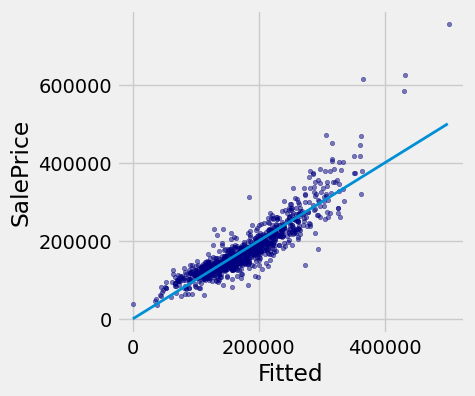

In [64]:
def fit(row):
    return sum(best_slopes * np.array(row))

test['Fitted'] = test_attributes.apply(fit, axis=1)

fig, ax = plt.subplots(figsize=(4,4))

ax.scatter(
    test['Fitted'], 
    test['SalePrice'],   
    color='navy', 
    alpha=0.5,
    s=10
)

x_label = 'Fitted'
y_label = 'SalePrice'

plt.ylabel(y_label)
plt.xlabel(x_label)

plt.plot([0, 5e5], [0, 5e5], lw=2)

plt.show()

A residual plot for multiple regression typically compares the errors (residuals) to the actual values of the predicted variable. We see in the residual plot below that we have systematically underestimated the value of expensive houses, shown by the many positive residual values on the right side of the graph.

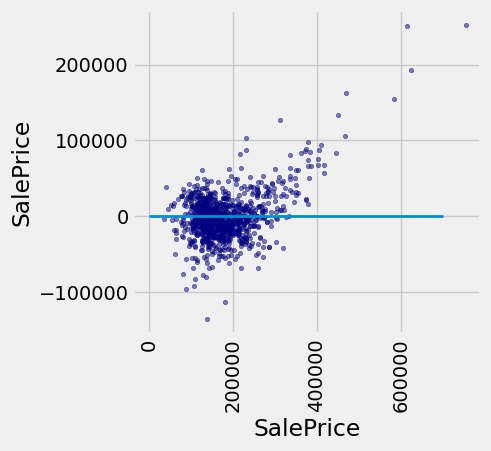

In [65]:
test['Residual'] = test_prices-test_attributes.apply(fit, axis=1)

fig, ax = plt.subplots(figsize=(4,4))

ax.scatter(
    test['SalePrice'], 
    test['Residual'],   
    color='navy', 
    alpha=0.5,
    s=10
)

x_label = 'SalePrice'

y_label = 'SalePrice'

plt.ylabel(y_label)

plt.xlabel(x_label)

plt.xticks(rotation=90)

plt.plot([0, 7e5], [0, 0], lw=2)

plt.show()

As with simple linear regression, interpreting the result of a predictor is at least as important as making predictions. There are many lessons about interpreting multiple regression that are not included in this textbook. A natural next step after completing this text would be to study linear modeling and regression in further depth.

## Nearest Neighbors for Regression

Another approach to predicting the sale price of a house is to use the price of similar houses. This *nearest neighbor* approach is very similar to our classifier. To speed up computation, we will only use the attributes that had the highest correlation with the sale price in our original analysis.

In [68]:
train_nn = train.iloc[:, [0, 1, 2, 3, 4, 8]]
test_nn = test.iloc[:, [0, 1, 2, 3, 4, 8]]
train_nn

SalePrice  1st Flr SF  2nd Flr SF  Total Bsmt SF  Garage Area  \
2142     127000         864           0          864.0        576.0   
2201     148500         567         531          531.0        216.0   
2643     110000         813           0          813.0        270.0   
1703     317000        1143        1330         1143.0        852.0   
26       126000         882           0          882.0        525.0   
...         ...         ...         ...            ...          ...   
867      198500         840         885          840.0        550.0   
1396     152400         864         486          576.0        627.0   
1222      87000         453         453          348.0        231.0   
691      115000         818         406          818.0        210.0   
2149     200000         860         869          860.0        542.0   

      Year Built  
2142        1972  
2201        1930  
2643        1930  
1703        2004  
26          1970  
...          ...  
867         2002  
1396        1941  
1222        1937  
691         1926  
2149        2002  

[1001 rows x 6 columns]

The computation of closest neighbors is identical to a nearest-neighbor classifier. In this case, we will exclude the `'SalePrice'` rather than the `'Class'` column from the distance computation. The five nearest neighbors of the first test row are shown below.

In [25]:
def distance(pt1, pt2):
    """The distance between two points, represented as arrays."""
    return np.sqrt(np.sum((pt1 - pt2) ** 2))
    
def row_distance(row1, row2):
    """The distance between two rows of a table."""
    return distance(np.array(row1), np.array(row2))

def distances(training, example, output):
    """Compute the distance from example for each row in training."""
    dists = []
    attributes = training.drop(columns=[output])
    for row in range(len(attributes)):
        dists.append(row_distance(attributes.iloc[row], example))
    training['Distance'] = dists
    #print(training)
    return training

def closest(training, example, k, output):
    """Return a table of the k closest neighbors to example."""
    distance = distances(training, example, output).sort_values(by=['Distance']).take(np.arange(k))
    return distance

train_nn_A = train_nn.copy()
example_nn_row = test_nn.drop(test_nn.columns[0], axis=1).iloc[0]
closest(train_nn_A, example_nn_row, 5, 'SalePrice')

SalePrice  1st Flr SF  2nd Flr SF  Total Bsmt SF  Garage Area  \
141      165500        1700           0         1398.0        447.0   
375      200000        1671           0         1427.0        484.0   
578      150000        1620           0         1281.0        490.0   
2715     180000        1721           0         1461.0        440.0   
1183     290000        1671           0         1426.0        550.0   

      Year Built    Distance  
141         1959   72.270326  
375         1978  112.058021  
578         1976  117.209215  
2715        1968  132.653684  
1183        1976  138.859641

One simple method for predicting the price is to average the prices of the nearest neighbors.

In [26]:
example_nn_row

1st Flr SF       1721.0
2nd Flr SF          0.0
Total Bsmt SF    1331.0
Garage Area       464.0
Year Built       1957.0
Name: 1924, dtype: float64

In [27]:
def predict_nn(example):
    """Return the majority class among the k nearest neighbors."""
    train_nn_B = train_nn.copy()
    
    col_sales_price = closest(train_nn_B, example, 5, 'SalePrice')
    return np.average(col_sales_price['SalePrice'])

predict_nn(example_nn_row)

np.float64(197100.0)

Finally, we can inspect whether our prediction is close to the true sale price for our one test example. Looks reasonable!

In [28]:
print('Actual sale price:', test_nn['SalePrice'].iloc[0])
print('Predicted sale price using nearest neighbors:', predict_nn(example_nn_row))

Actual sale price: 174850
Predicted sale price using nearest neighbors: 197100.0


### Evaluation

To evaluate the performance of this approach for the whole test set, we apply `predict_nn` to each test example, then compute the root mean squared error of the predictions. Computation of the predictions may take several minutes.

In [29]:
def predict_nn(example):
    """Return the majority class among the k nearest neighbors."""
    train_nn_B = train_nn.copy()
    
    col_sales_price = closest(train_nn_B, example, 5, 'SalePrice')
    return np.average(col_sales_price['SalePrice']).item(0)

predict_nn(example_nn_row)

197100.0

In [30]:
test_nn_C = test_nn.copy()
test_nn_drop = test_nn_C.drop(columns=['SalePrice'])

nn_test_predictions = test_nn_drop.apply(predict_nn, axis=1)
rmse_nn = np.mean((test_prices - nn_test_predictions) ** 2) ** 0.5

print('Test set RMSE for multiple linear regression: ', rmse_linear)
print('Test set RMSE for nearest neighbor regression:', rmse_nn)

Test set RMSE for multiple linear regression:  30125.47384508643
Test set RMSE for nearest neighbor regression: 33266.600357451876


For these data, the errors of the two techniques are quite similar! For different data sets, one technique might outperform another. By computing the RMSE of both techniques on the same data, we can compare methods fairly. One note of caution: the difference in performance might not be due to the technique at all; it might be due to the random variation due to sampling the training and test sets in the first place.

Finally, we can draw a residual plot for these predictions. We still underestimate the prices of the most expensive houses, but the bias does not appear to be as systematic. However, fewer residuals are very close to zero, indicating that fewer prices were predicted with very high accuracy. 

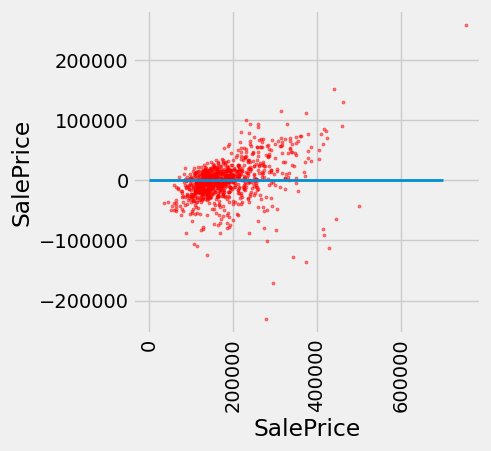

In [31]:
test['Residual'] = test_prices-nn_test_predictions

fig, ax = plt.subplots(figsize=(4,4))

ax.scatter(
    test['SalePrice'], 
    test['Residual'],   
    color='red', 
    alpha=0.5,
    s=5
)

x_label = 'SalePrice'
y_label = 'SalePrice'
plt.ylabel(y_label)
plt.xlabel(x_label)
plt.xticks(rotation=90)
plt.plot([0, 7e5], [0, 0], lw=2)
plt.show()